# ST2195 Coursework Project - Part 2

Please note that the explanation of my results is done in the report and here, I have explained my code throughout to what I am doing in each chunk.



### Importing all the required libraries

In [2]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


### Setting the working directory


setting up the working directory continuing from current directory that file is in to ensure that it works elsewhere:

In [3]:

# directory of the currently running script is:
script_dir = os.path.dirname(os.path.abspath("TarushiGangwar_220460295_CW_Part2_python.ipynb"))
# !! NOTE: currently the name of the file is "TarushiGangwar_220460295_CW_Part2_python.ipynb" which must be changed if the name of the file is changed!!

# setting the working directory to the script directory so that it runs regardless of where the file is
os.chdir(script_dir)

# checking if the working directory has been set correctly by printing the current wd
print(os.getcwd())

/Users/sushii/SIM_UOL/Year 2 acads/Programming for DS/Coursework/FINAL



### Establishing the connection


please ensure that the database file is in the same directory as this file (mentioned above). The following database contains files for the years 1997 to 2006 (10 years) and I have chosen these years in light of the merger that Boeing had with merger with McDonnell Douglas in 1997.

In [3]:
conn = sqlite3.connect('CW_FLIGHTS_DATA.db')
c = conn.cursor()

### I did not use the following chunk but it should be used to create database if it is not already in the computer.
The following code should help me create the database in SQLite using the csv files that I have downloaded from the dataverse, however, I did not need to use this code as I directly imported my data to SQLite and then established a connection.

In [1]:

# # connecting to the SQLite database (can be empty or not):

# connection = sqlite3.connect('CW_FLIGHTS_DATA.db')



# # the data is read from the downloaded CSV files into a DataFrame (using pandas):

# data = pd.read_csv('1997.csv', '1998.csv', '1999.csv', '2000.csv', '2001.csv', '2002.csv', 
#                    '2003.csv', '2004.csv','2005.csv', '2006.csv', 'airports.csv', 'carriers.csv', 'plane-data.csv',
#                   'variable-descriptions.csv')



# # writing changes into the dataframe (onto SQLite database)
# data.to_sql('1997to2006', connection, index=False, if_exists='replace')



# # "committing" the changes
# connection.commit()


### Checking what are all the tables in the database

the following code shows the tables that are in the database.

In [3]:
c.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()

[('1997to2006',),
 ('airports',),
 ('carriers',),
 ('plane-data',),
 ('variable-descriptions',)]

## Part 2(a)

Here, I am testing a query to see if the data in the database needs any adjustment. I realised that the departure time and departure delay columns were stored as objects hence I changed them to numeric. I also go rid of the NA values.

In [5]:
# testing query 

query = '''
SELECT Year, DayOfWeek, DepTime, DepDelay
FROM `1997to2006`
'''

# creating a dataframe for the above query
df = pd.read_sql_query(query,conn)
cleaned_df = df.dropna() # dropping all the NA values

#printing the information and description of the dataframe above
print(cleaned_df.info()) 
print(cleaned_df.describe())

# checking how many null values therer are (there are 0)
print(cleaned_df.isna().sum())

# changing the departure time and departure delay columns to numeric as they are "objects"
df["DepTime"] = pd.to_numeric(df["DepTime"],errors="coerce")
df["DepDelay"] = pd.to_numeric(df["DepDelay"],errors="coerce")

#re-printing info for corrected df
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61146962 entries, 0 to 61146961
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Year       int64 
 1   DayOfWeek  int64 
 2   DepTime    object
 3   DepDelay   object
dtypes: int64(2), object(2)
memory usage: 1.8+ GB
None
               Year     DayOfWeek
count  6.114696e+07  6.114696e+07
mean   2.001807e+03  3.942054e+00
std    2.891329e+00  1.989730e+00
min    1.997000e+03  1.000000e+00
25%    1.999000e+03  2.000000e+00
50%    2.002000e+03  4.000000e+00
75%    2.004000e+03  6.000000e+00
max    2.006000e+03  7.000000e+00
Year         0
DayOfWeek    0
DepTime      0
DepDelay     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61146962 entries, 0 to 61146961
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Year       int64  
 1   DayOfWeek  int64  
 2   DepTime    float64
 3   DepDelay   float64
dtypes: float64(2), int64(2)
memory usage: 1.8 GB
None


### creating a for-loop to get the answer for 2(a)

I intentionally presented the data in a way that shows the time of day rather than the actual time so that it is easier to compare.

In [26]:
# creating a range of years for the for-loop
Years = range(1997,2007)

# creating a for-loop to repeat the query for all 10 year
for Year in Years:
    print(f"Year:{Year}")
    query = f'''
    SELECT DayOfWeek,
    CASE
    WHEN CAST(DepTime/100 AS INTEGER)<6 THEN "Night"
    WHEN CAST(DepTime/100 AS INTEGER)<12 THEN "Morning"
    WHEN CAST(DepTime/100 AS INTEGER)<18 THEN "Afternoon"
    ELSE "Evening"
    END AS TimeOfDay, AVG(DepDelay) as AvgDepDelay
    FROM `1997to2006`
    WHERE Year={Year} AND DepDelay>0
    GROUP BY DayOfWeek
    ORDER BY AvgDepDelay ASC
    
    '''
    c.execute(query)
    results=c.fetchall()
    result=results[2]
    print(f"DayOfWeek: {result[0]}, TimeOfDay: {result[1]}, AvgDepDelay: {result[2]}")
    
    
# order by AvgDepDelay (ascending) then put result[0] to make it minimum as it only shows the minimum (top1) value.

Year:1997
DayOfWeek: 6, TimeOfDay: Afternoon, AvgDepDelay: 19.611843389327678
Year:1998
DayOfWeek: 1, TimeOfDay: Afternoon, AvgDepDelay: 21.997847936620552
Year:1999
DayOfWeek: 3, TimeOfDay: Afternoon, AvgDepDelay: 23.786029657296215
Year:2000
DayOfWeek: 1, TimeOfDay: Evening, AvgDepDelay: 25.077719869175496
Year:2001
DayOfWeek: 1, TimeOfDay: Morning, AvgDepDelay: 22.078974962801542
Year:2002
DayOfWeek: 3, TimeOfDay: Afternoon, AvgDepDelay: 21.65841177195939
Year:2003
DayOfWeek: 2, TimeOfDay: Afternoon, AvgDepDelay: 24.413979804329887
Year:2004
DayOfWeek: 5, TimeOfDay: Morning, AvgDepDelay: 27.564999067862065
Year:2005
DayOfWeek: 7, TimeOfDay: Evening, AvgDepDelay: 27.511427664158678
Year:2006
DayOfWeek: 3, TimeOfDay: Morning, AvgDepDelay: 28.669232910901524


To visualise the above results better, I want to add a plot to show the minimum average departure delay against the time of day.

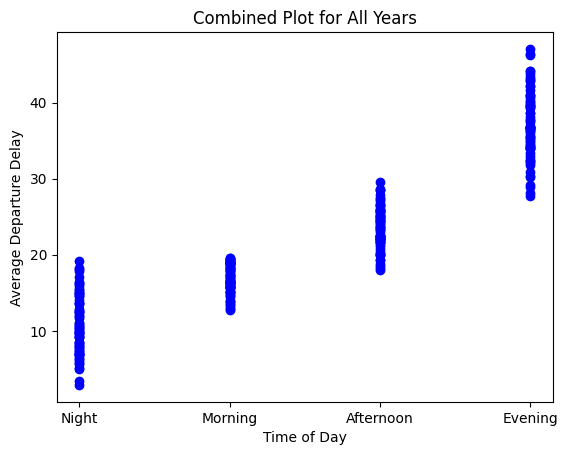

In [33]:
# initializing empty lists to store all x and y values

all_x_values = []
all_y_values = []

for Year in Years:
    query = f'''
    SELECT DayOfWeek,
    CASE
    WHEN CAST(DepTime/100 AS INTEGER)<6 THEN "Night"
    WHEN CAST(DepTime/100 AS INTEGER)<12 THEN "Morning"
    WHEN CAST(DepTime/100 AS INTEGER)<18 THEN "Afternoon"
    ELSE "Evening"
    END AS TimeOfDay, AVG(DepDelay) as AvgDepDelay
    FROM `1997to2006`
    WHERE Year = {Year} AND DepDelay>0
    GROUP BY DayOfWeek, TimeOfDay
    ORDER BY AvgDepDelay
    
    '''
    
    c.execute(query)
    results=c.fetchall()
    # results=c.fetchmany(size=1)
    
    
    x_values = [result[1] for result in results]  # x values are in the second column
    y_values = [result[2] for result in results]  # y values are in the third column
    
    # Append the x and y values to the all_x_values and all_y_values lists
    all_x_values.extend(x_values)
    all_y_values.extend(y_values)


# plotting the data for all years on a single graph
plt.scatter(all_x_values, all_y_values, marker='o', color='blue')
plt.xlabel('Time of Day')
plt.ylabel('Average Departure Delay')
plt.title('Combined Plot for All Years')
plt.grid(False) # no grid as it makes plot look messy
plt.show()

The plot above shows that as we move from night to evening, the length of the delay increases.

## Part 2(b)

Here I have written a query to get all the required tables (1997to2006 and plane-data) and columns, to get the year that the plane flew in and to get the year it was manufatured in. I also created an "AircraftAge" column to make it easier to compare how long the plane has flown.

Making a data frame of this query can help to see whether or not old planes suffer more delays.


In [4]:
# query 2 for 2(b)

query2='''

SELECT f.Year as FlightYear, a.year as ManufactYear, 
AVG(f.DepDelay + f.ArrDelay) as AvgTotalDelay,
AVG(f.DepDelay) as AvgDepDelay,
AVG(f.ArrDelay) as AvrArrDelay, 
(f.Year-a.year) as AircraftAge
FROM 
`1997to2006` f
JOIN 
`plane-data` a on f.TailNum = a.tailnum
WHERE 
(f.DepDelay>0 OR f.ArrDelay>0)
AND AircraftAge>0
GROUP BY 
f.Year, AircraftAge
ORDER BY 
f.Year, AircraftAge, a.year
'''

# making a dataframe of the query
df=pd.read_sql_query(query2, conn)
df

# counting total delay for each yr to see what delay is

,FlightYear,ManufactYear,AvgTotalDelay,AvgDepDelay,AvrArrDelay,AircraftAge
0,1997,1996,28.785463,13.507441,15.278023,1
1,1997,1995,26.216210,11.857473,14.358737,2
2,1997,1994,26.351013,11.810993,14.540020,3
3,1997,1993,27.434645,12.723636,14.711009,4
4,1997,1992,28.165257,13.172771,14.992485,5
...,...,...,...,...,...,...
379,2006,1962,47.613032,21.606383,26.006649,44
380,2006,1959,52.786429,23.797857,28.988571,47
381,2006,1957,32.801242,14.971014,17.830228,49
382,2006,1956,45.190476,21.224490,23.965986,50


To visualise the results dataframe above, lets plot it.

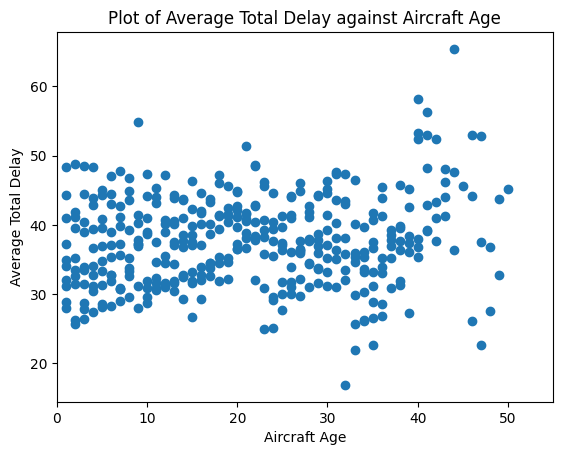

In [6]:

lower_limit = 0  
upper_limit = 55 

# # Plotting Average Total Delay against Aircraft Age
plt.scatter(df['AircraftAge'], df['AvgTotalDelay'])
plt.xlabel('Aircraft Age')
plt.ylabel('Average Total Delay')
plt.title('Plot of Average Total Delay against Aircraft Age')
plt.xlim(lower_limit, upper_limit)  # showing the aircraft age between 0 and 50
plt.show()


Above, I plotted the Average Total Delay against the Aircraft Age which visualizes the spread of the average total delay across the aircraft age (difference between the manufacture year and flight year). The plot shows no clear trend and the data is rather well balanced. This shows that in reality, older planes DO NOT suffer more delays.


## Part 2(c)

### importing all the additional required packages

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

### code for 2(c)

This code contains the machine learning train-test-split model. The whole code is in a 'for' loop to ensure that it runs for every year. Here, I have only used years 1997 to 1999 as  running the model for all years was taking extremely long to run (it didnt run in over 5 hours) and was causing Jupyter Notebook to crash. 

The model only takes numerical data, thus, we need to convert the strings to mumerical. This is encoding. There are are 2 types of encoders, label and one hot. In the code I am using OneHotEncoder which is for nominal variables.

Creating a pipeline is similar to creating a function. Once we create the pipeline we can refer back to it and use the code we fed onto it again.

As we saw from the Rmd file(the R code), there is a very very small percentage of 0.21% (probability = 0.0021) of US flights being diverted. Hence, I have kept the test size extremely small. Furthermore, i put the random_state (the shuffling function) = 3 which is pretty small meaning that the data in the training-testing will not be "shuffled" much.


In [10]:

# I am running the code for 3 years, 1997-1999 to make it run faster and for with clarity
years = range(1997, 2000) # change to code "years = range(1997, 2007)" to run for all years

coefficients=[]
features=[]



for year in years:
    query3 = f'''
    SELECT f.year, f.Diverted, f.Month, f.DayofMonth, f.CRSDepTime, f.CRSArrTime, f.Distance, f.UniqueCarrier, 
    o.lat as orig_lat, o.long as orig_long, d.lat as dest_lat, d.long as dest_long
    FROM `1997to2006` f
    JOIN airports o ON f.Origin = o.iata
    JOIN airports d ON f.Dest = d.iata
    WHERE f.Year = {year}
    '''
    df = pd.read_sql_query(query3, conn)
    df.replace("NA", 1, inplace=True)

    x = df.drop("Diverted", axis=1)
    y = df["Diverted"].astype("int")

    # splitting the features into categorical and numerical
    categorical_features = ["UniqueCarrier"]
    numerical_features = ["Year", "DayofMonth", "CRSDepTime", "CRSArrTime", "Distance", "orig_lat", "orig_long", "dest_lat", "dest_long", "Month"]

    encoder_pipeline = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    scaler_pipeline = Pipeline(steps=[("scaler", StandardScaler())])

    column_transformer = ColumnTransformer(
        transformers=[
            ("cat", encoder_pipeline, categorical_features),
            ("num", scaler_pipeline, numerical_features)
        ])

    model = Pipeline(steps=[
        ("preprocessor", column_transformer),
        ("classifier", LogisticRegression(solver="liblinear"))
    ])

    # splitting the data into training and testing
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.001, random_state=3)

    # Additional print statements to debug
    print("Number of features in xtrain (before preprocessing):", xtrain.shape[1])

    model.fit(xtrain, ytrain)

    # printing information about the preprocessor (to see the progress)
    print("Number of features in xtrain (after preprocessing):", model.named_steps["preprocessor"].transform(xtrain).shape[1])

    probabilities = model.predict_proba(xtest)[:, -1]

    # printing the information about the preprocessor for xtest (to see the progress)
    print("Number of features in xtest (after preprocessing):", model.named_steps["preprocessor"].transform(xtest).shape[1])

    if year == min(years):
        categorical_features = model.named_steps["preprocessor"].transformers_[0][1]\
            .named_steps["onehot"].get_feature_names_out(categorical_features)
        features = numerical_features + list(categorical_features)

    coefficients.append(model.named_steps["classifier"].coef_[0]) # appending the model to "coefficients"



coef_df = pd.DataFrame(coefficients, columns=features, index=years) # making a dataframe from "coefficients"
print(coef_df)

#to get the length of the features and coefficients
print(len(features), len(coefficients))

# to check the shape of xtrain to know what it looks like
print(xtrain.shape)



Number of features in xtrain (before preprocessing): 11
Number of features in xtrain (after preprocessing): 20
Number of features in xtest (after preprocessing): 20
Number of features in xtrain (before preprocessing): 11
Number of features in xtrain (after preprocessing): 20
Number of features in xtest (after preprocessing): 20
Number of features in xtrain (before preprocessing): 11
Number of features in xtrain (after preprocessing): 20
Number of features in xtest (after preprocessing): 20
          Year  DayofMonth  CRSDepTime  CRSArrTime  Distance  orig_lat  \
1997 -0.408131    0.047642   -0.496068   -0.765798 -1.008352 -0.452298   
1998 -0.602560   -0.139555   -0.544179   -0.735239 -0.852439 -0.518223   
1999 -0.404125    0.149661   -0.680297   -0.847864 -0.894013 -0.405684   

      orig_long  dest_lat  dest_long     Month  UniqueCarrier_AA  \
1997  -0.634858 -0.702045  -0.710450 -0.482310               0.0   
1998  -0.425836 -0.779582  -0.526681 -0.423954               0.0   
1999

### Visualising the Coefficients

I chose to visualise the data as a line graph as it is the neatest and most easily-comparable form of visualisation for this data. 

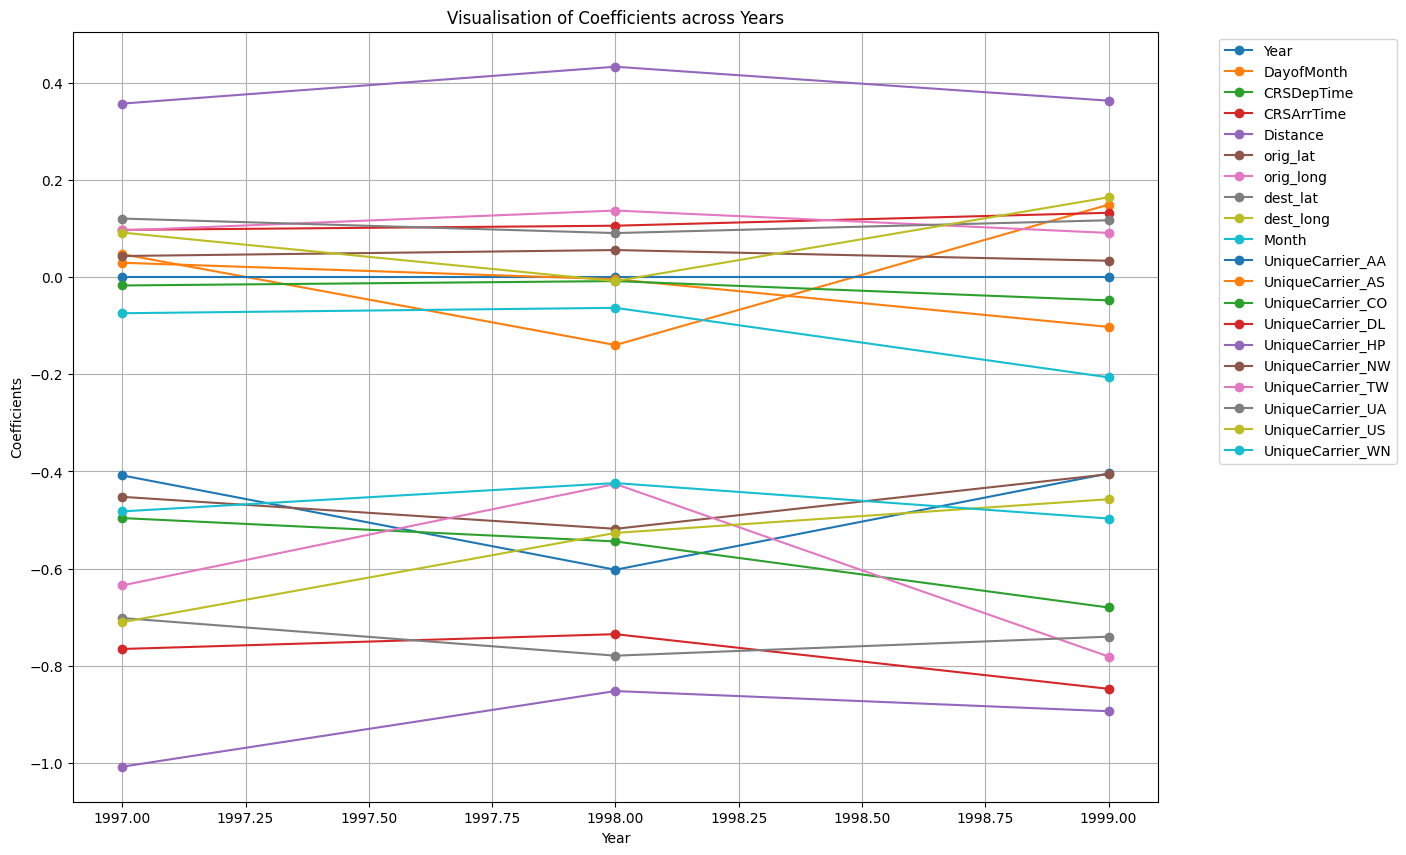

In [11]:
plt.figure(figsize=(14,10))
for feature in coef_df.columns:
    plt.plot(coef_df.index, coef_df[feature], marker= "o", label = feature)
    
plt.title("Visualisation of Coefficients across Years")
plt.xlabel("Year")
plt.ylabel("Coefficients")
plt.legend(bbox_to_anchor = (1.05,1), loc = "upper left")
plt.grid(True)
plt.show()
